In [ ]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd

import json
from pandas.io.json import json_normalize   

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

%matplotlib inline



In [ ]:
from google.colab import files
uploaded = files.upload()

# se carga el dataset
#dataset=pd.read_json('Datos_SIATA_Aire_pm25.json')

#with open('/kaggle/input/datos-siata-calidad-del-aire/Datos_SIATA_Aire_pm25.json') as f:
#   dataset = json.load(f)

with open('Datos_SIATA_Aire_pm25_2018-2019.json') as f: 
    dataset = json.load(f)

In [ ]:
X = json_normalize(dataset,'datos',['nombre','latitud','longitud'])
dataset = json_normalize(dataset)
dataset.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,latitud,codigoSerial,datos,nombre,nombreCorto,longitud
0,6.379038,3,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Girardota - S.O.S Aburrá Norte,GIR-SOSN,-75.450913
1,6.252561,12,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Estación Tráfico Centro,CEN-TRAF,-75.569580
2,6.263370,25,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...","Medellín, centro occidente - Universidad Naci...",MED-UNNV,-75.577004
3,6.185667,28,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Itagüí - Casa de Justicia Itagüí,ITA-CJUS,-75.597206
4,6.099081,31,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Caldas - Corporacion Universitaria Lasallista,CAL-LASA,-75.638626
5,6.168497,38,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Itagüí - I.E. Concejo Municipal de Itagüí,ITA-CONC,-75.644356
6,6.182542,44,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...","Medellín, El Poblado - Tanques La Ye EPM",MED-LAYE,-75.550636
7,6.152313,48,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Estación Tráfico Sur,SUR-TRAF,-75.627487
8,6.093078,69,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Caldas - E U Joaquín Aristizabal,CAL-JOAR,-75.637764
9,6.155531,78,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",La Estrella - Hospital,EST-HOSP,-75.644173


In [ ]:
print(X)

       variableConsulta                fecha  ...  latitud  longitud
0                  pm25  2018-08-28 04:00:00  ...  6.37904  -75.4509
1                  pm25  2018-08-28 05:00:00  ...  6.37904  -75.4509
2                  pm25  2018-08-28 06:00:00  ...  6.37904  -75.4509
3                  pm25  2018-08-28 07:00:00  ...  6.37904  -75.4509
4                  pm25  2018-08-28 08:00:00  ...  6.37904  -75.4509
...                 ...                  ...  ...      ...       ...
183976             pm25  2019-08-28 00:00:00  ...  6.14548  -75.6214
183977             pm25  2019-08-28 01:00:00  ...  6.14548  -75.6214
183978             pm25  2019-08-28 02:00:00  ...  6.14548  -75.6214
183979             pm25  2019-08-28 03:00:00  ...  6.14548  -75.6214
183980             pm25  2019-08-28 04:00:00  ...  6.14548  -75.6214

[183981 rows x 7 columns]


In [ ]:
# Desempaquetamos la Columna de daos  (unpack the Column datos)

X=X.drop(['variableConsulta', 'calidad'], axis=1)   # elimino columna que dice PM2.5 y la de calidad que parece que no tiene sentido.

#X = X.iloc[:,1:]    # elimino la columna que dice PM2.5 

X = X.values
print(X)

[['2018-08-28 04:00:00' 15.0 'Girardota - S.O.S Aburrá Norte' 6.3790379
  -75.4509125]
 ['2018-08-28 05:00:00' 20.0 'Girardota - S.O.S Aburrá Norte' 6.3790379
  -75.4509125]
 ['2018-08-28 06:00:00' 29.0 'Girardota - S.O.S Aburrá Norte' 6.3790379
  -75.4509125]
 ...
 ['2019-08-28 02:00:00' 15.5873 'Sabaneta - I.E. Rafael J. Mejía'
  6.1454778 -75.6214142]
 ['2019-08-28 03:00:00' 20.3708 'Sabaneta - I.E. Rafael J. Mejía'
  6.1454778 -75.6214142]
 ['2019-08-28 04:00:00' 17.9231 'Sabaneta - I.E. Rafael J. Mejía'
  6.1454778 -75.6214142]]


In [ ]:
# Cuidado aqui los valores por debajo de 0.0 se entiende que no hubo sensado, y los valores por encima de 151 se hacen iguales a un valor maximo entendiendo 
# un sensado alto, se deja a evaluacion que si dicho valor alto es seguido por valores pequenos debe entenderse entonces como un error en el sensor.

for i in range(183981):
  if (X[i,1:2] <= 0.0):
    X[i,1:2] = 1.0
  if (X[i,1:2] > 151.0):
    X[i,1:2] = 160.0

In [ ]:
#for i in range (0, 183981, 24):
for i in range (0, 183960, 24):
#for i in range (9169, 9193, 24):
#for i in range (9169, 9217, 24):
 # print(i)
  #valo1 = []
  valo2 = []
  flag = 0
  #valo1 = np.ones(24)
  origin = []
  valo1 = X[i:24+i,1:2]

################ Creo un vector sin los errores #############################
  for j in range (24):
    if (valo1[j] != 1.0 and valo1[j] != 160.0):
      valo2.append(valo1[j])
############################################################################
  valo2 = np.array(valo2)
  flag = len(valo2)
  if (flag >= 12): 
    prome = np.mean(valo2)
    aux = prome
  if (flag < 12):
    prome = aux

################ Arreglo X (DB original) #############################
  for j in range (len(valo1)):
    if ( valo1[j] == 160.0 or valo1[j] == 1.0): 
      valo1[j] = prome
  #origin = valo1
  X[i:24+i,1:2] = valo1
############################################################################
  
  

In [ ]:
# Separacion de los datos por estacion de medicion.
# Atencion los primeros 720 datos DE CADA itervalo corresponde al primer mes de cada estacion.

Xa = X[0:8761,:]          # 'Girardota - S.O.S Aburrá Norte'
Xb = X[8761:17522,:]      # 'Estación Tráfico Centro'
Xc = X[17522:26283,:]     # 'Medellín,  centro occidente - Universidad Nacional, sede El Volador'
Xd = X[26283:35044,:]     # 'Itagüí - Casa de Justicia Itagüí'
Xe = X[35044:43805,:]     # 'Caldas - Corporacion Universitaria Lasallista'
Xf = X[43805:52566,:]     # 'Itagüí - I.E. Concejo Municipal de Itagüí'
Xg = X[52566:61327,:]     # 'Medellín, El Poblado - Tanques La Ye EPM'
Xh = X[61327:70088,:]     # 'Estación Tráfico Sur'
Xi = X[70088:78849,:]     # 'Caldas - E U Joaquín Aristizabal'
Xj = X[78849:87610,:]     # 'La Estrella - Hospital'
Xk = X[87610:96371,:]     # 'Medellín, Altavista - I.E. Pedro Octavio Amado'
Xl = X[96371:105132,:]    # 'Medellín, Villahermosa - Planta de producción de agua potable EPM'
Xm = X[105132:113893,:]   # 'Barbosa - Torre Social'
Xn = X[113893:122654,:]   # 'Copacabana - Ciudadela Educativa La Vida'
Xo = X[122654:131415,:]   # 'Medellin, Belén - I.E Pedro Justo Berrio'
Xp = X[131415:140176,:]   # 'Medellín, El Poblado - I.E INEM sede Santa Catalina'
Xq = X[140176:148937,:]   # 'Medellín, San Cristobal - Parque Biblioteca Fernando Botero'
Xr = X[148937:157698,:]   # 'Medellín, Aranjuez - I.E Ciro Mendia'
Xs = X[157698:166459,:]   # 'Bello - I.E. Fernando Vélez'
Xt = X[166459:175220,:]   # 'Envigado - E.S.E. Santa Gertrudis'
Xu = X[175220:183981,:]   # 'Sabaneta - I.E. Rafael J. Mejía'

In [ ]:
# Funcion para dibujar la senal de DOS formas diferentes enviandole el mes, el dia y la estacion.

def plot_mes (Y, a, b):
  #a= float(a)
  b= int(b)
  ver = Y[720*a:720+720*a, :]
  c = 720  
  if (b > 0):
    ver = ver[24*b:24+24*b, :]
    c = 24

  plt.figure(figsize=(20,10))
  t=np.linspace(0, c, c)
  plt.plot(t,ver[:,1])
  plt.title('Material Particulado PM 2.5', pad = 20, fontdict={'fontsize':20, 'color': '#4873ab'})
  plt.xlabel('Horas')
  plt.ylabel('PM 2.5')
  plt.minorticks_on()
  plt.grid(b=True, which='minor')
  plt.grid()
  plt.show()

  import plotly.express as px

  #fig = px.line(ver, x= ver[:,0], y = ver[:,1])

  ver = pd.DataFrame(ver)
  ver.columns =['Fecha', 'Q(Aire)', 'Sensor', 'latitud', 'longitud']
  fig = px.line(ver, x = 'Fecha', y = 'Q(Aire)')
  
  fig.show()
  

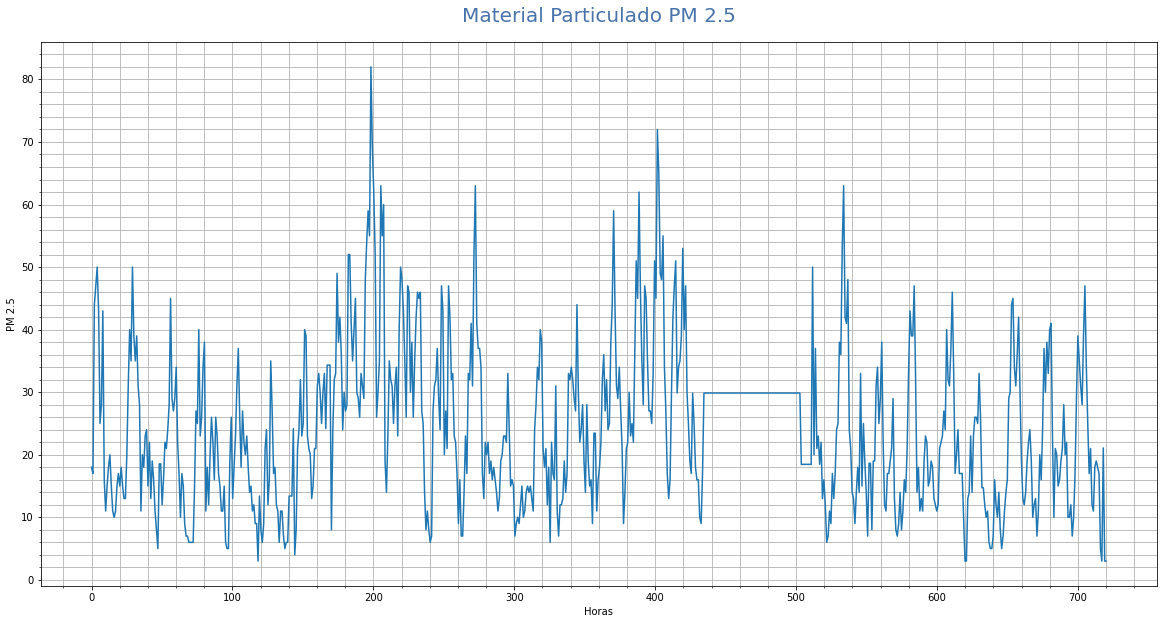

In [ ]:
# Si en dia_selec se escoge 0 (ZERO) se plotea todo el mes.

meses_dic = {'Septiembre(2018)' : 0, 'Octubre(2018)' : 1, 'Noviembre(2018)' : 2, 'Diciembre(2018)' : 3, 'Enero(2019)' : 4, 'Febrero(2019)' : 5, 'Marzo(2019)' : 6, 
         'Abril(2019)' : 7, 'Mayo(2019)' : 8, 'junio(2019)' : 9, 'Julio(2019)' : 10, 'Agosto(2019)' : 11}
estacion_dic = {'Girardota - S.O.S Aburra Norte' : Xa, 'Estacion Trafico Centro' : Xb, 'Medellin,  centro occidente - Universidad Nacional, sede El Volador' : Xc,
             'Itagui - Casa de Justicia Itagui' : Xd, 'Caldas - Corporacion Universitaria Lasallista' : Xe, 'Itagui - I.E. Concejo Municipal de Itagui' : Xf,
             'Medellin, El Poblado - Tanques La Ye EPM' : Xg, 'Estacion Trafico Sur' : Xh, 'Caldas - E U Joaquin Aristizabal' : Xi,
             'La Estrella - Hospital' : Xj, 'Medellin, Altavista - I.E. Pedro Octavio Amado' : Xk, 'Medellin, Villahermosa - Planta de produccion de agua potable EPM' : Xl,
             'Barbosa - Torre Social' : Xm, 'Copacabana - Ciudadela Educativa La Vida' : Xn, 'Medellin, Belen - I.E Pedro Justo Berrio' : Xo, 
             'Medellin, El Poblado - I.E INEM sede Santa Catalina' : Xp, 'Medellin, San Cristobal - Parque Biblioteca Fernando Botero' : Xq,
             'Medellin, Aranjuez - I.E Ciro Mendia' : Xr, 'Bello - I.E. Fernando Velez' : Xs, 'Envigado - E.S.E. Santa Gertrudis' : Xt, 
             'Sabaneta - I.E. Rafael J. Mejia' : Xu}

estacion_selec = 'Estacion Trafico Centro'  # @param ['Girardota - S.O.S Aburra Norte', 'Estacion Trafico Centro', 'Medellin,  centro occidente - Universidad Nacional, sede El Volador', 'Itagui - Casa de Justicia Itagui', 'Caldas - Corporacion Universitaria Lasallista', 'Itagui - I.E. Concejo Municipal de Itagui', 'Medellin, El Poblado - Tanques La Ye EPM', 'Estacion Trafico Sur', 'Caldas - E U Joaquin Aristizabal', 'La Estrella - Hospital', 'Medellin, Altavista - I.E. Pedro Octavio Amado', 'Medellin, Villahermosa - Planta de produccion de agua potable EPM', 'Barbosa - Torre Social', 'Copacabana - Ciudadela Educativa La Vida', 'Medellin, Belen - I.E Pedro Justo Berrio', 'Medellin, El Poblado - I.E INEM sede Santa Catalina', 'Medellin, San Cristobal - Parque Biblioteca Fernando Botero', 'Medellin, Aranjuez - I.E Ciro Mendia', 'Bello - I.E. Fernando Velez', 'Envigado - E.S.E. Santa Gertrudis', 'Sabaneta - I.E. Rafael J. Mejía']
mes_selec = 'Septiembre(2018)'  # @param ['Septiembre(2018)', 'Octubre(2018)', 'Noviembre(2018)', 'Diciembre(2018)', 'Enero(2019)', 'Febrero(2019)', 'Marzo(2019)', 'Abril(2019)', 'Mayo(2019)', 'junio(2019)', 'Julio(2019)', 'Agosto(2019)']
dia_selec = "0"  # @param [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]


plot_mes((estacion_dic[estacion_selec]), meses_dic[mes_selec], dia_selec)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



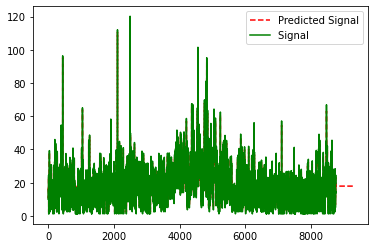

R2= 0.9881726492463754


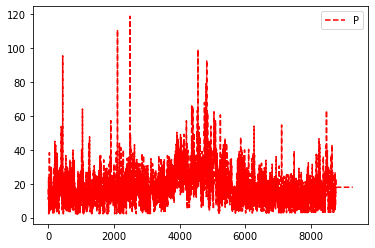

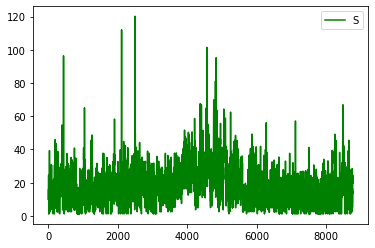

In [ ]:
# Entrenamiento del modelo

from sklearn.svm import SVR

#model = SVR(kernel='rbf', C = 125, epsilon=1e-3, gamma=20) # C = Parametro de regularizacion , epsilon es la tolerancia en el rango (tube).
model = SVR(kernel='rbf', C = 125, epsilon=1, gamma=20) # C = Parametro de regularizacion , epsilon es la tolerancia en el rango (tube).

data = Xp[:,1:2]
t = np.linspace(0, data.size, data.size).reshape(data.size,1)
t1 =  np.linspace(0, data.size+520, data.size+520).reshape(data.size+520,1)

########### Normalizacion ####################
#means = np.mean(data)
#stds = np.std(data)
#data = (data - means)/stds

#sc_data = StandardScaler()
#sc_t = StandardScaler()
#data1 = sc_data.fit_transform(data)
#t1 = sc_t.fit_transform(t)
###############################################



model.fit(t,data)

y_pred = model.predict(t1)

#plt.figure(figsize=(15,15))
plt.plot(t1,y_pred,'--r')
plt.plot(t,data,'-g')
plt.legend(('Predicted Signal','Signal '))
plt.show()

print('R2=',r2_score(data,y_pred[:8761]))

plt.plot(t1,y_pred,'--r')
plt.legend('Predicted Signal')
plt.show()
plt.plot(t,data,'-g')
plt.legend('Signal ')
plt.show()


In [ ]:
#print(np.mean(Xp[:,1:2]))
print(y_pred[-1])

17.765462147954764


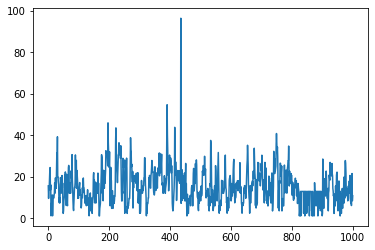

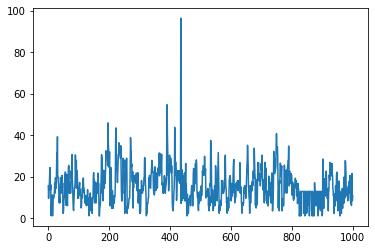

In [ ]:
#print(np.amax(data))
#print(np.amax(y_pred))

#print(y_pred[8761:])
#print(np.mean(y_pred))


plt.plot(t[:1000],data[:1000])
plt.show()

plt.plot(t[:1000],y_pred[:1000])
plt.show()

In [ ]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {#'C': [125],
              'epsilon':[0.1, 1e-3, 1e-6]}   
              #'gamma': [50]}
              #'kernel':['rbf','poly','sigmoid']}    # esta es la grilla de parametros donde se buscara cual es la mejo configuracion o los parametros que se haran
                                                    # variar para luego buscar que combinacion tuvo el mejor resultado.
clf = GridSearchCV(model, param_grid)
clf = clf.fit(t, data)


print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best params found by grid search:")
print(clf.best_params_)
print("Best index found by grid search:")
print(clf.best_index_)
'''

'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {#\'C\': [125],\n              \'epsilon\':[0.1, 1e-3, 1e-6]}   \n              #\'gamma\': [50]}\n              #\'kernel\':[\'rbf\',\'poly\',\'sigmoid\']}    # esta es la grilla de parametros donde se buscara cual es la mejo configuracion o los parametros que se haran\n                                                    # variar para luego buscar que combinacion tuvo el mejor resultado.\nclf = GridSearchCV(model, param_grid)\nclf = clf.fit(t, data)\n\n\nprint("Best estimator found by grid search:")\nprint(clf.best_estimator_)\nprint("Best params found by grid search:")\nprint(clf.best_params_)\nprint("Best index found by grid search:")\nprint(clf.best_index_)\n'

In [ ]:
########################################################################################

In [ ]:
# Intento uso de SKTIME

#! pip install SKTIME
#! pip install pmdarima

     |████████████████████████████████| 5.7MB 3.5MB/s 
     |████████████████████████████████| 22.2MB 6.5MB/s 
     |████████████████████████████████| 3.2MB 52.1MB/s 
     |████████████████████████████████| 9.5MB 156kB/s 
     |████████████████████████████████| 25.3MB 51.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: llvmlite 0.31.0
    Uninstalling llvmlite-0.31.0:
      Successfully uninstalled llvmlite-0.31.0
  Found existing installation: numba 0.48.0
    Uninstalling numba-0.48.0:
      Successfully uninstalled numba-0.48.0
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


     |████████████████████████████████| 1.5MB 4.3MB/s 
     |████████████████████████████████| 2.1MB 21.5MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
#import numpy as np
#from sktime.datasets import load_airline

from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.all import *
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.fbprophet import Prophet

In [ ]:
a = 6
Xp1 = pd.DataFrame(Xp[0:720*a,1:2])
#Xp1 = Xp1.drop([0, 2, 3, 4], axis= 1)
Xp1 = Xp1.squeeze()
#Xp1 = Xp1.values
#Xp1 = Xp1.T
#Xp1 = pd.Series(Xp1)
#Xp1 = pd.DataFrame(Xp1)
Xp1 = Xp1.astype('float64', copy=False)
Xp1

0       15.66900
1        9.62716
2       14.42590
3       14.41110
4       19.25640
          ...   
4315    17.05640
4316    18.27840
4317    17.08270
4318    18.31240
4319    17.09170
Name: 0, Length: 4320, dtype: float64

In [ ]:
Xp1.index

RangeIndex(start=0, stop=4320, step=1)

[Guia](https://github.com/alan-turing-institute/sktime/blob/master/examples/01_forecasting.ipynb) uso SKtime y diferentes forecasters

In [ ]:
# To use forecasting.fbprophet
#z = Xp1.copy()
#z = z.to_timestamp(freq="M")
#z_train, z_test = temporal_train_test_split(z, test_size=36)

0.3650664147074613

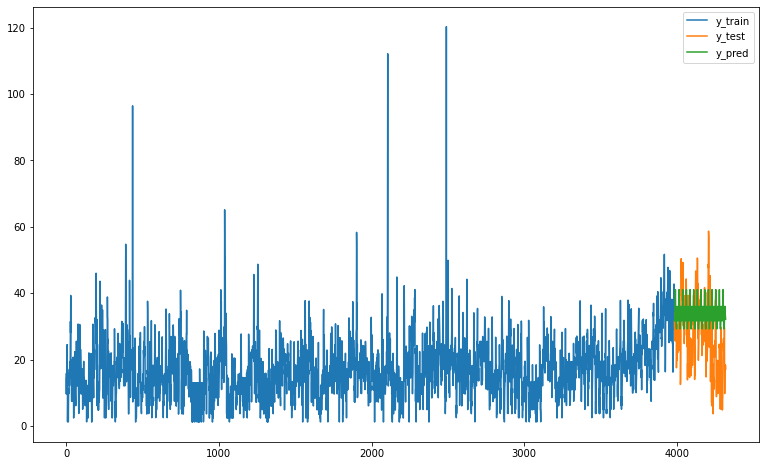

In [ ]:
y = Xp1
y_train, y_test = temporal_train_test_split(y, test_size=336)

#fh = np.arange(1, len(y_test) + 1)  # forecasting horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

#forecaster = ThetaForecaster(sp=120)  # daily seasonal periodicity
#forecaster = NaiveForecaster(strategy="last", sp=24)

#regressor = KNeighborsRegressor(n_neighbors=3)
#forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=12, strategy="recursive")

#forecaster = ExponentialSmoothing(trend=None, seasonal="add", sp=24)
  # trend = "add", "mul", "additive", "multiplicative", None. --> same for seasonal
  # combinaciones que encontre aceptadas: (None, mul), (add, add), (mul, add)??, (None, add),

forecaster = AutoETS(auto=True, sp=24, n_jobs=-1)

#forecaster = AutoARIMA(sp=24, suppress_warnings=True)
  #A single ARIMA model can also be manually configured.
  #forecaster = ARIMA(order=(1, 1, 0), seasonal_order=(0, 1, 0, 12), suppress_warnings=True)


forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

#plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
#plt.plot(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.figure(figsize=(13,8))
plt.plot(y_train)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

# **ThetaForecaster**

{'sp': 24} NaiveForecaster(sp=24)


,mean_fit_time,mean_score_time,param_sp,params,mean_test_sMAPE,rank_test_sMAPE
0,0.000722,7.958863,12,{'sp': 12},0.472430,5
1,0.000076,7.368750,24,{'sp': 24},0.386710,1
2,0.000081,7.462899,48,{'sp': 48},0.415825,2
3,0.000070,7.489161,72,{'sp': 72},0.432421,3
4,0.000065,7.639474,100,{'sp': 100},0.503755,6
5,0.000071,7.404765,120,{'sp': 120},0.449000,4
6,0.000112,7.445705,250,{'sp': 250},0.530222,7


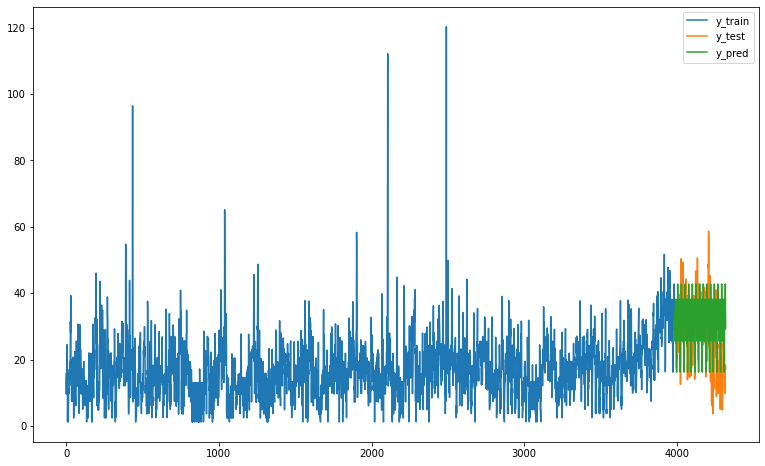

In [ ]:
from sktime.forecasting.model_selection import (ForecastingGridSearchCV, SlidingWindowSplitter)


param_grid = {'sp':[12, 24, 48, 72, 100, 120, 250] }    # esta es la grilla de parametros donde se buscara cual es la mejo configuracion o los parametros que se haran
                                                    # variar para luego buscar que combinacion tuvo el mejor resultado.

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv.fit(y_train)
y_pred = gscv.predict(fh)

plt.figure(figsize=(13,8))
plt.plot(y_train)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

#print(gscv.best_params_, gscv.best_forecaster_.regressor_.best_params_)
print(gscv.best_params_, gscv.best_forecaster_)
pd.DataFrame(gscv.cv_results_)

# **NaiveForecaster**

/usr/local/lib/python3.6/dist-packages/sktime/forecasting/naive.py:111: UserWarning:

For the `drift` strategy, the `sp` value will be ignored.

/usr/local/lib/python3.6/dist-packages/sktime/forecasting/naive.py:111: UserWarning:

For the `drift` strategy, the `sp` value will be ignored.

/usr/local/lib/python3.6/dist-packages/sktime/forecasting/naive.py:111: UserWarning:

For the `drift` strategy, the `sp` value will be ignored.



{'sp': 12, 'strategy': 'drift'} NaiveForecaster(sp=12, strategy='drift')


/usr/local/lib/python3.6/dist-packages/sktime/forecasting/naive.py:111: UserWarning:

For the `drift` strategy, the `sp` value will be ignored.



,mean_fit_time,mean_score_time,param_sp,param_strategy,params,mean_test_sMAPE,rank_test_sMAPE
0,0.000124,7.712175,12,last,"{'sp': 12, 'strategy': 'last'}",0.472430,9
1,0.000086,7.862003,12,mean,"{'sp': 12, 'strategy': 'mean'}",0.364205,6
2,0.000273,9.719223,12,drift,"{'sp': 12, 'strategy': 'drift'}",0.281708,1
3,0.000073,7.406431,24,last,"{'sp': 24, 'strategy': 'last'}",0.386710,7
4,0.000082,8.083402,24,mean,"{'sp': 24, 'strategy': 'mean'}",0.352139,5
5,0.000288,9.536497,24,drift,"{'sp': 24, 'strategy': 'drift'}",0.281708,1
6,0.000067,7.710624,48,last,"{'sp': 48, 'strategy': 'last'}",0.415825,8
7,0.000081,8.009854,48,mean,"{'sp': 48, 'strategy': 'mean'}",0.351901,4
8,0.000278,9.901545,48,drift,"{'sp': 48, 'strategy': 'drift'}",0.281708,1


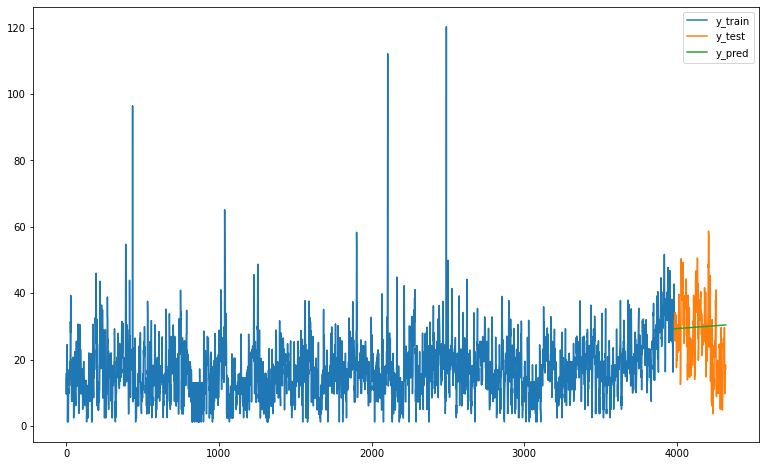

In [ ]:
param_grid = {'strategy': ["last", "mean", "drift"],
              'sp':[12, 24, 48] }    # esta es la grilla de parametros donde se buscara cual es la mejo configuracion o los parametros que se haran
                                                    # variar para luego buscar que combinacion tuvo el mejor resultado.

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv.fit(y_train)
y_pred = gscv.predict(fh)

plt.figure(figsize=(13,8))
plt.plot(y_train)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

#print(gscv.best_params_, gscv.best_forecaster_.regressor_.best_params_)
print(gscv.best_params_, gscv.best_forecaster_)
pd.DataFrame(gscv.cv_results_)


# **ReducedRegressionForecaster**

{'window_length': 1} RecursiveRegressionForecaster(regressor=KNeighborsRegressor(n_neighbors=3),
                              window_length=1)


,mean_fit_time,mean_score_time,param_window_length,params,mean_test_sMAPE,rank_test_sMAPE
0,0.456463,9.381913,1,{'window_length': 1},0.307159,1
1,0.479806,9.239052,3,{'window_length': 3},0.309149,2
2,0.446003,9.778042,5,{'window_length': 5},0.309669,3
3,0.310120,9.729903,10,{'window_length': 10},0.321389,4
4,0.310319,9.496656,15,{'window_length': 15},0.334329,5
5,0.296861,13.584937,20,{'window_length': 20},0.356750,6


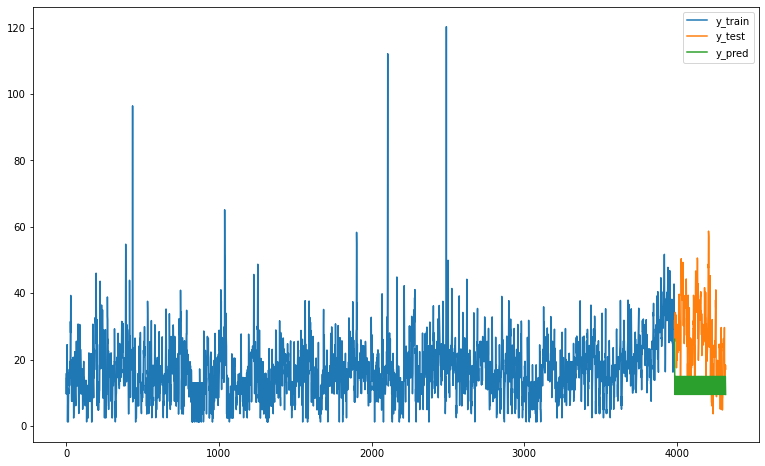

In [ ]:
param_grid = {"window_length": [1, 3, 5, 10, 15, 20]}    # esta es la grilla de parametros donde se buscara cual es la mejo configuracion o los parametros que se haran
                                                    # variar para luego buscar que combinacion tuvo el mejor resultado.

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv.fit(y_train)
y_pred = gscv.predict(fh)

plt.figure(figsize=(13,8))
plt.plot(y_train)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

#print(gscv.best_params_, gscv.best_forecaster_.regressor_.best_params_)
print(gscv.best_params_, gscv.best_forecaster_)
pd.DataFrame(gscv.cv_results_)

# **ExponentialSmoothing**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarn

{'seasonal': 'mul', 'sp': 48, 'trend': 'add'} ExponentialSmoothing(seasonal='mul', sp=48, trend='add')


,mean_fit_time,mean_score_time,param_seasonal,param_sp,param_trend,params,mean_test_sMAPE,rank_test_sMAPE
0,0.408848,67.158506,add,12,add,"{'seasonal': 'add', 'sp': 12, 'trend': 'add'}",0.476543,5
1,0.684100,75.155772,add,12,mul,"{'seasonal': 'add', 'sp': 12, 'trend': 'mul'}",1.391234,25
2,0.413913,66.962876,add,12,additive,"{'seasonal': 'add', 'sp': 12, 'trend': 'additi...",0.476543,5
3,0.666623,75.157199,add,12,multiplicative,"{'seasonal': 'add', 'sp': 12, 'trend': 'multip...",1.391234,25
4,0.459019,66.845629,add,24,add,"{'seasonal': 'add', 'sp': 24, 'trend': 'add'}",0.521532,9
5,0.670084,75.188262,add,24,mul,"{'seasonal': 'add', 'sp': 24, 'trend': 'mul'}",1.952496,45
6,0.465240,67.073255,add,24,additive,"{'seasonal': 'add', 'sp': 24, 'trend': 'additi...",0.521532,9
7,0.670663,74.511079,add,24,multiplicative,"{'seasonal': 'add', 'sp': 24, 'trend': 'multip...",1.952496,45
8,0.471644,67.158105,add,48,add,"{'seasonal': 'add', 'sp': 48, 'trend': 'add'}",0.531329,13
9,0.707539,75.228293,add,48,mul,"{'seasonal': 'add', 'sp': 48, 'trend': 'mul'}",1.824519,37


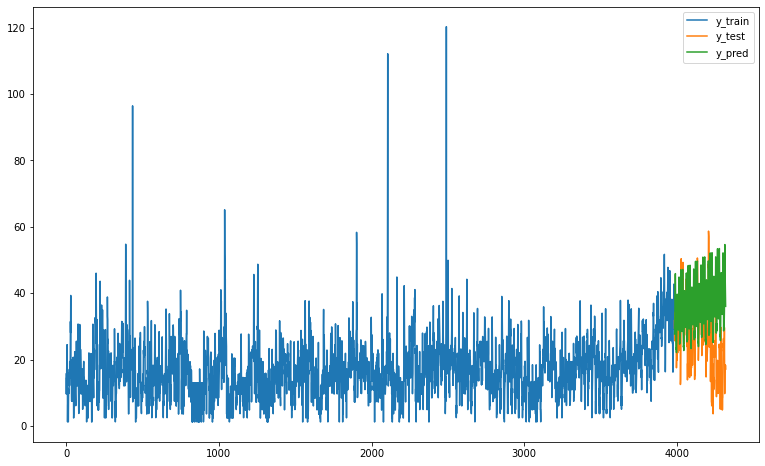

In [ ]:
param_grid = {"trend": ["add", "mul", "additive", "multiplicative"], 
              "seasonal": ["add", "mul", "additive", "multiplicative"],
              "sp":[12, 24, 48]}    # esta es la grilla de parametros donde se buscara cual es la mejo configuracion o los parametros que se haran
                                                    # variar para luego buscar que combinacion tuvo el mejor resultado.

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv.fit(y_train)
y_pred = gscv.predict(fh)

plt.figure(figsize=(13,8))
plt.plot(y_train)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

#print(gscv.best_params_, gscv.best_forecaster_.regressor_.best_params_)
print(gscv.best_params_, gscv.best_forecaster_)
pd.DataFrame(gscv.cv_results_)




# **AutoETS**

In [ ]:
param_grid = {'sp':[12, 24, 48, 72, 100, 120, 250] }    # esta es la grilla de parametros donde se buscara cual es la mejo configuracion o los parametros que se haran
                                                    # variar para luego buscar que combinacion tuvo el mejor resultado.

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv.fit(y_train)
y_pred = gscv.predict(fh)

plt.figure(figsize=(13,8))
plt.plot(y_train)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

#print(gscv.best_params_, gscv.best_forecaster_.regressor_.best_params_)
print(gscv.best_params_, gscv.best_forecaster_)
pd.DataFrame(gscv.cv_results_)

# **AutoARIMA**

In [ ]:
param_grid = {'sp':[12, 24, 48, 72, 100, 120, 250] }    # esta es la grilla de parametros donde se buscara cual es la mejo configuracion o los parametros que se haran
                                                    # variar para luego buscar que combinacion tuvo el mejor resultado.

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv.fit(y_train)
y_pred = gscv.predict(fh)

plt.figure(figsize=(13,8))
plt.plot(y_train)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

#print(gscv.best_params_, gscv.best_forecaster_.regressor_.best_params_)
print(gscv.best_params_, gscv.best_forecaster_)
pd.DataFrame(gscv.cv_results_)

In [ ]:
#######################################################################################################################################################

In [ ]:
#######################################################################################################################################################

## Acercamiento al uso de mapas 

In [ ]:
# Algunas librerias que he usado

!pip install geojson
!pip install geopandas
!pip install geojsonio


     |████████████████████████████████| 972kB 5.9MB/s 
     |████████████████████████████████| 6.5MB 21.7MB/s 
     |████████████████████████████████| 14.8MB 286kB/s 
     |████████████████████████████████| 153kB 4.2MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 2.6MB 26.4MB/s 
  Created wheel for geojsonio: filename=geojsonio-0.0.3-cp36-none-any.whl size=5038 sha256=81c211055c6641263ef2516c53a38f581974d3b99ce05b0335b9be581db511c8
  Stored in directory: /root/.cache/pip/wheels/a9/ef/7c/7bbf228825e8717adaa84cd4b6c4ed8649b7958dd2bac45076
Successfully built geojsonio


In [ ]:
import geojson
import geopandas as gpd
import geojsonio

In [ ]:
# Area_Met_01.geojson mapa del area metropolitana separada por municipios.

from google.colab import files
uploaded = files.upload()

states = gpd.read_file('Area_Met_01.geojson')
states.head()

Saving Area_Met_01.geojson to Area_Met_01.geojson


,id,AREA,DPTO_CCDGO,LATITUD,LONGITUD,MPIO_CCDGO,MPIO_CDPMP,MPIO_CNMBR,Shape_Area,Shape_Leng,VERSION,geometry
0,282,3.748306e+08,05,6.257590,-75.611031,001,05001,MEDELLÍN,0.030607,1.032922,2018,"MULTIPOLYGON (((-75.66974 6.37360, -75.66965 6..."
1,289,1.477584e+08,05,6.358841,-75.589736,088,05088,BELLO,0.012068,0.614364,2018,"MULTIPOLYGON (((-75.58203 6.42510, -75.58157 6..."
2,291,2.056662e+08,05,6.443418,-75.329241,079,05079,BARBOSA,0.016804,0.770018,2018,"MULTIPOLYGON (((-75.32144 6.51265, -75.32140 6..."
3,331,7.799670e+07,05,6.154395,-75.546868,266,05266,ENVIGADO,0.006368,0.480262,2018,"MULTIPOLYGON (((-75.52651 6.19632, -75.52602 6..."
4,336,6.776072e+07,05,6.351883,-75.500756,212,05212,COPACABANA,0.005535,0.513073,2018,"MULTIPOLYGON (((-75.49086 6.42228, -75.49104 6..."


In [ ]:
states.columns

Index(['id', 'AREA', 'DPTO_CCDGO', 'LATITUD', 'LONGITUD', 'MPIO_CCDGO',
       'MPIO_CDPMP', 'MPIO_CNMBR', 'Shape_Area', 'Shape_Leng', 'VERSION',
       'geometry'],
      dtype='object')

In [ ]:
#geojsonio.display(states) # Requires authentication????

In [ ]:
#states

,id,AREA,DPTO_CCDGO,LATITUD,LONGITUD,MPIO_CCDGO,MPIO_CDPMP,MPIO_CNMBR,Shape_Area,Shape_Leng,VERSION,geometry
0,282,3.748306e+08,05,6.257590,-75.611031,001,05001,MEDELLÍN,0.030607,1.032922,2018,"MULTIPOLYGON (((-75.66974 6.37360, -75.66965 6..."
1,289,1.477584e+08,05,6.358841,-75.589736,088,05088,BELLO,0.012068,0.614364,2018,"MULTIPOLYGON (((-75.58203 6.42510, -75.58157 6..."
2,291,2.056662e+08,05,6.443418,-75.329241,079,05079,BARBOSA,0.016804,0.770018,2018,"MULTIPOLYGON (((-75.32144 6.51265, -75.32140 6..."
3,331,7.799670e+07,05,6.154395,-75.546868,266,05266,ENVIGADO,0.006368,0.480262,2018,"MULTIPOLYGON (((-75.52651 6.19632, -75.52602 6..."
4,336,6.776072e+07,05,6.351883,-75.500756,212,05212,COPACABANA,0.005535,0.513073,2018,"MULTIPOLYGON (((-75.49086 6.42228, -75.49104 6..."
5,350,1.327559e+08,05,6.054447,-75.626427,129,05129,CALDAS,0.010836,0.529328,2018,"MULTIPOLYGON (((-75.66629 6.11848, -75.66629 6..."
6,389,1.964956e+07,05,6.179279,-75.614204,360,05360,ITAGÜÍ,0.001604,0.212419,2018,"MULTIPOLYGON (((-75.60070 6.20017, -75.60061 6..."
7,397,8.285600e+07,05,6.379746,-75.447957,308,05308,GIRARDOTA,0.006768,0.415671,2018,"MULTIPOLYGON (((-75.44746 6.43418, -75.44734 6..."
8,1120,1.583532e+07,05,6.138305,-75.608806,631,05631,SABANETA,0.001293,0.172905,2018,"MULTIPOLYGON (((-75.60355 6.15510, -75.60350 6..."
9,1121,3.663179e+07,05,6.137596,-75.648955,380,05380,LA ESTRELLA,0.002990,0.284163,2018,"MULTIPOLYGON (((-75.65229 6.17061, -75.65216 6..."


In [ ]:
#states['STATION'] = X[]
X = pd.DataFrame(X)
X.columns =['Fecha', 'Q(Aire)', 'Sensor', 'latitud', 'longitud']
X1 = gpd.GeoDataFrame(X)
states['Sensor'] = [100,63,26,115,21,87,94,80,102,124]   # Esto para ejemplo evaluacion
states
X1

,Fecha,Q(Aire),Sensor,latitud,longitud
0,2018-08-28 04:00:00,15,Girardota - S.O.S Aburrá Norte,6.37904,-75.4509
1,2018-08-28 05:00:00,20,Girardota - S.O.S Aburrá Norte,6.37904,-75.4509
2,2018-08-28 06:00:00,29,Girardota - S.O.S Aburrá Norte,6.37904,-75.4509
3,2018-08-28 07:00:00,22,Girardota - S.O.S Aburrá Norte,6.37904,-75.4509
4,2018-08-28 08:00:00,29,Girardota - S.O.S Aburrá Norte,6.37904,-75.4509
...,...,...,...,...,...
183976,2019-08-28 00:00:00,15.6297,Sabaneta - I.E. Rafael J. Mejía,6.14548,-75.6214
183977,2019-08-28 01:00:00,18.0261,Sabaneta - I.E. Rafael J. Mejía,6.14548,-75.6214
183978,2019-08-28 02:00:00,15.5873,Sabaneta - I.E. Rafael J. Mejía,6.14548,-75.6214
183979,2019-08-28 03:00:00,20.3708,Sabaneta - I.E. Rafael J. Mejía,6.14548,-75.6214


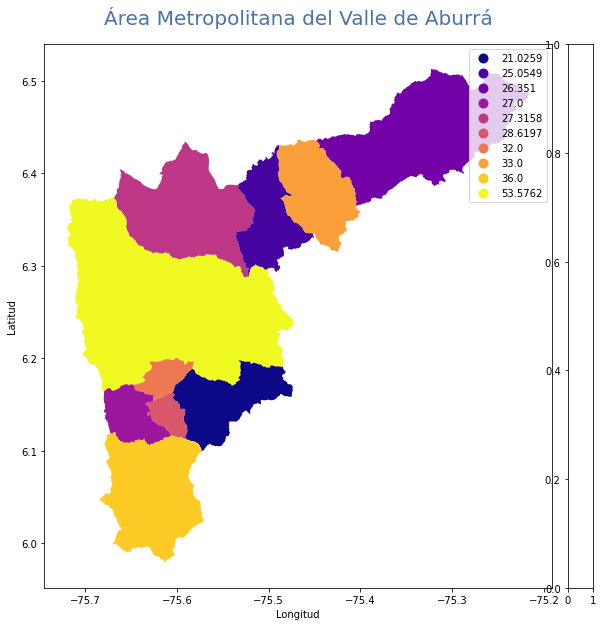

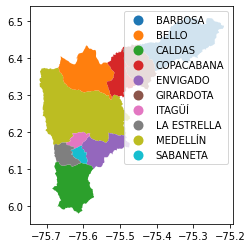

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Área Metropolitana del Valle de Aburrá', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)



mes = 'Abril(2019)'  # @param ['Septiembre(2018)', 'Octubre(2018)', 'Noviembre(2018)', 'Diciembre(2018)', 'Enero(2019)', 'Febrero(2019)', 'Marzo(2019)', 'Abril(2019)', 'Mayo(2019)', 'junio(2019)', 'Julio(2019)', 'Agosto(2019)']
dia = "12"  # @param [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
mes = meses_dic[mes]
hor = 2 #@param {type:"slider", min:0, max:23, step:1}
dia = 24*np.int(dia)
mes = 720*mes
real =[]
real.append(Xo[mes+dia+hor:mes+dia+hor+1, 1:2])  # 'Medellin, Belén - I.E Pedro Justo Berrio'
real.append(Xs[mes+dia+hor:mes+dia+hor+1, 1:2])  # 'Bello - I.E. Fernando Vélez'
real.append(Xm[mes+dia+hor:mes+dia+hor+1, 1:2])  # 'Barbosa - Torre Social'
real.append(Xt[mes+dia+hor:mes+dia+hor+1, 1:2])  # 'Envigado - E.S.E. Santa Gertrudis'
real.append(Xn[mes+dia+hor:mes+dia+hor+1, 1:2])  # 'Copacabana - Ciudadela Educativa La Vida'
real.append(Xe[mes+dia+hor:mes+dia+hor+1, 1:2])  # 'Caldas - Corporacion Universitaria Lasallista'
real.append(Xf[mes+dia+hor:mes+dia+hor+1, 1:2])  # 'Itagüí - I.E. Concejo Municipal de Itagüí'
real.append(Xa[mes+dia+hor:mes+dia+hor+1, 1:2])  # 'Girardota - S.O.S Aburrá Norte'
real.append(Xu[mes+dia+hor:mes+dia+hor+1, 1:2])  # 'Sabaneta - I.E. Rafael J. Mejía'
real.append(Xj[mes+dia+hor:mes+dia+hor+1, 1:2])  # 'La Estrella - Hospital'

real = np.array(real)
real = real.reshape(10,1)
#real = real.tolist()
real
states['Sensor'] = real   # Esto para ejemplo evaluacion



# Mostrar el mapa finalizado
#states.plot(column='Sensor', cmap='plasma', ax=ax, zorder=5)
#states.plot(cmap='plasma', ax=ax, zorder=5)
states.plot(column='Sensor', cmap='plasma', ax=ax, # cmap='plasma'
              legend=True, cax=cax, zorder=5)
states.plot(column='MPIO_CNMBR', legend = True)



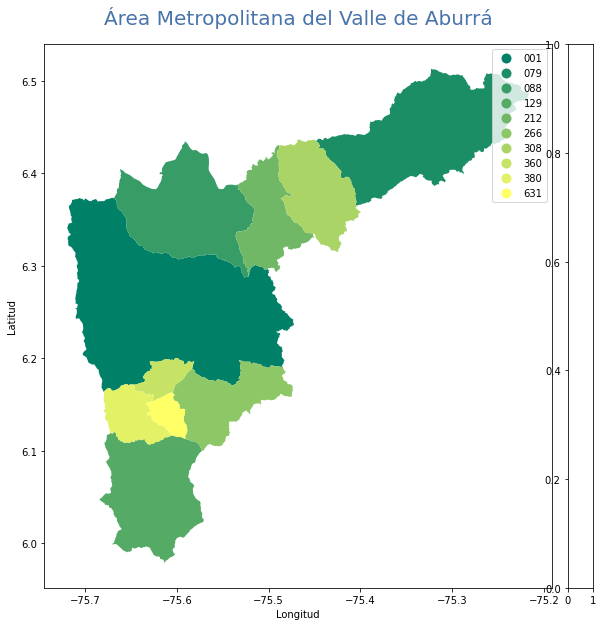

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
#ax.axis([-12, 5, 32, 48])
 
# Control del título y los ejes
ax.set_title('Área Metropolitana del Valle de Aburrá', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
states.plot(column='MPIO_CNBR', cmap='summer', ax=ax, # cmap='plasma'
              legend=True, cax=cax, zorder=5)

In [ ]:
!pip install -U plotly

In [ ]:
import plotly.express as px
fig = px.line(states, x= 'MPIO_CNMBR', y = 'Sensor')
fig.show()

In [ ]:
df = pd.DataFrame(X)
print(X)

In [ ]:
fig = px.choropleth(data_frame=df, 
                    geojson=states, 
                    locations='MPIO_CNMBR', # nombre de la columna del Dataframe
                    featureidkey='properties.MPIO_CNMBR,  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color='1', #El color depende de las cantidades
                    color_continuous_scale="burg", #greens
                    #scope="north america"
                   )
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

fig.update_layout(
    title_text = 'Casos de infección en México',
    font=dict(
        #family="Courier New, monospace",
        family="Ubuntu",
        size=18,
        color="#7f7f7f"
    ),
    annotations = [dict(
        x=0.55,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='Fuente: <a href="https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Mexico">\
            Wikipedia </a>',
        showarrow = False
    )]
)

fig.show()
